## Log

- **01-17-18 :** sklearn example 

***

# Linear Regression

- LMS
- $(X^TX)^{-1}X^Ty$
- exmples

In [ ]:
def LMS(y, x, w = None):
       
    i = 0
    maxIter = 100
    alpha, count = 0.001, 0
    
    # reshape x
    X = np.insert(x, 0, 1, axis=1)
    size, predictors = shape(X)
    
    if not w:
        w = np.zeros(predictors)
    
    while (i < maxIter) : # and abs(sum(w)) < predictors*5 :
        i += 1
           
        for j in xrange(size) :    
            expect_value = w.dot(X[j])
            true_value = y[j]
            w = w - alpha * ( expect_value - true_value )*X[j] 
            
            #alpha /= (1 + alpha*count)
            #count+=1
            
    return w

### Fit Data Generated by Gaussian 

In [307]:
%pylab inline 
from scipy.stats import norm as gaussian 

Populating the interactive namespace from numpy and matplotlib


Average:
[[-0.87536876]
 [ 2.45588701]]
Cov:
[[ 45.28997114  32.43143366]
 [ 32.43143366  24.82436063]]


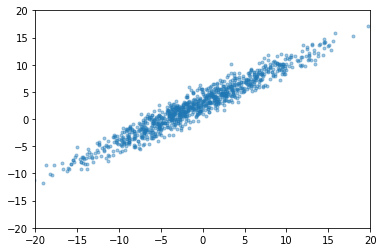

In [308]:
# Sample
X = gaussian.rvs(0,1,(2,1000)) # generate 2x1000 standard normal (y,x)
X[0,:] *= 8 # set y
X += np.array([[1],[2.5]]) # shift

# Rotate Matrix 
f = +pi/5
R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
# Rotate
V = R.dot(X)

# plot
# figure(figsize=(5,5)); 
a=20
xlim(-a,a);
ylim(-a,a);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;

# sample covariance matrix
avg = mean(V, axis=1).reshape(V[:,1].size,1)
print "Average:"
print avg
print "Cov:"
print dot(V-avg,(V-avg).T) / (V[0,:].size-1) 

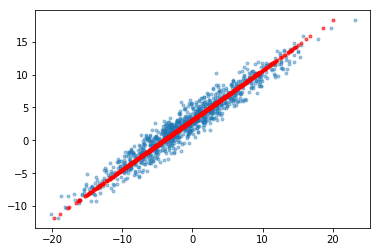

In [310]:
w_hat = LMS(V[0],V[1:,:].T)

plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(np.insert(V[1:,:].T,0,1,axis = 1).dot(w_hat),V[1,:], 'r.', alpha = 0.6 ) ;

### $ (X^TX)^{-1}X^Ty $

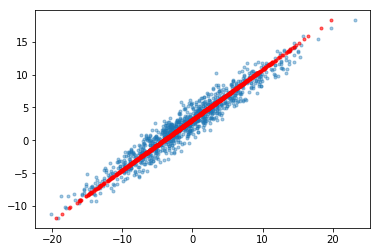

In [311]:
X = np.insert(V[1:,:].T,0,1,axis=1)
y = V[0]
W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)

plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot( X.dot(W_Hat)  ,V[1,:], 'r.', alpha = 0.6 ) ;

# 3D example

Average:
[[ 0.54569346]
 [ 2.21235774]
 [ 1.42178288]]
Cov:
[[ 27.1699199   23.44326299 -18.86319466]
 [ 23.44326299  21.96746558 -16.78979612]
 [-18.86319466 -16.78979612  14.50067194]]


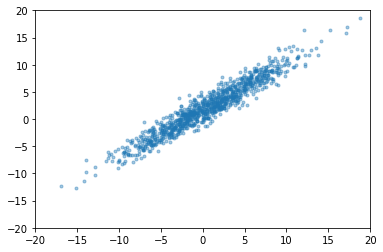

In [312]:
# Sample
X = gaussian.rvs(0,1,(3,1000)) # generate 2x1000 standard normal (y,x)
X[0,:] *= 8 # set y
X += np.array([[1],[2.5],[0]]) # shift

# Rotate Matrix 
f = +pi/5
R = array([[1,0,0],
           [0,cos(f),-sin(f)],
           [0,sin(f), cos(f)]]) 

R2 = array([[cos(f),-sin(f),0],
            [sin(f), cos(f),0],
            [0,0,1]]) 

R3 = array([[cos(f),0, sin(f)],
            [0,1,0],
            [-sin(f), 0, cos(f)]]) 
# Rotate
V = R3.dot(R2.dot(R.dot(X)))

# plot
# figure(figsize=(5,5)); 
a=20
xlim(-a,a);
ylim(-a,a);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;

# sample covariance matrix
avg = mean(V, axis=1).reshape(V[:,1].size,1)
print "Average:"
print avg
print "Cov:"
print dot(V-avg,(V-avg).T) / (V[0,:].size-1) 

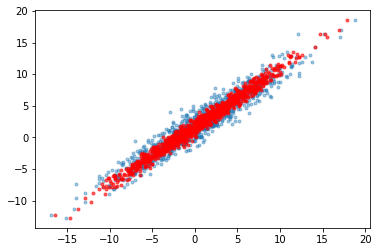

In [313]:
X = np.insert(V[1:,:].T,0,1,axis=1)
y = V[0]
W_Hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)

plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot( X.dot(W_Hat)  ,V[1,:], 'r.', alpha = 0.6 ) ;

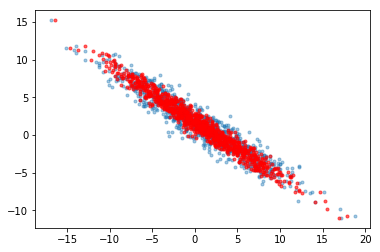

In [314]:
plot(V[0,:],V[2,:], '.', alpha=0.4) ;
plot( X.dot(W_Hat)  ,V[2,:], 'r.', alpha = 0.6 ) ;

***

# sklearn

> **sklearn.datasets**

 >       from sklearn.datasets import load_boston
 >       boston = load_boston()
 >       print(boston.DESCR)
 >       boston_df = boston.data

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [24]:
# https://www.kaggle.com/datasnaek/youtube-new/data
df = pd.read_csv('USvideos.csv')

In [25]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


- ## data info

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 16 columns):
video_id                  12200 non-null object
trending_date             12200 non-null object
title                     12200 non-null object
channel_title             12200 non-null object
category_id               12200 non-null int64
publish_time              12200 non-null object
tags                      12200 non-null object
views                     12200 non-null int64
likes                     12200 non-null int64
dislikes                  12200 non-null int64
comment_count             12200 non-null int64
thumbnail_link            12200 non-null object
comments_disabled         12200 non-null bool
ratings_disabled          12200 non-null bool
video_error_or_removed    12200 non-null bool
description               11990 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 1.2+ MB


In [27]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,12200.000000,1.220000e+04,1.220000e+04,1.220000e+04,1.220000e+04
mean,19.994672,1.260088e+06,4.638410e+04,3.523022e+03,6.133513e+03
std,7.584768,4.839451e+06,1.629561e+05,4.757525e+04,3.938482e+04
min,1.000000,6.870000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,9.067850e+04,2.011750e+03,8.600000e+01,2.820000e+02
50%,24.000000,3.145990e+05,9.073500e+03,3.290000e+02,1.029500e+03
75%,25.000000,1.006612e+06,2.953700e+04,1.132000e+03,3.374750e+03
max,43.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06


- ##  overview

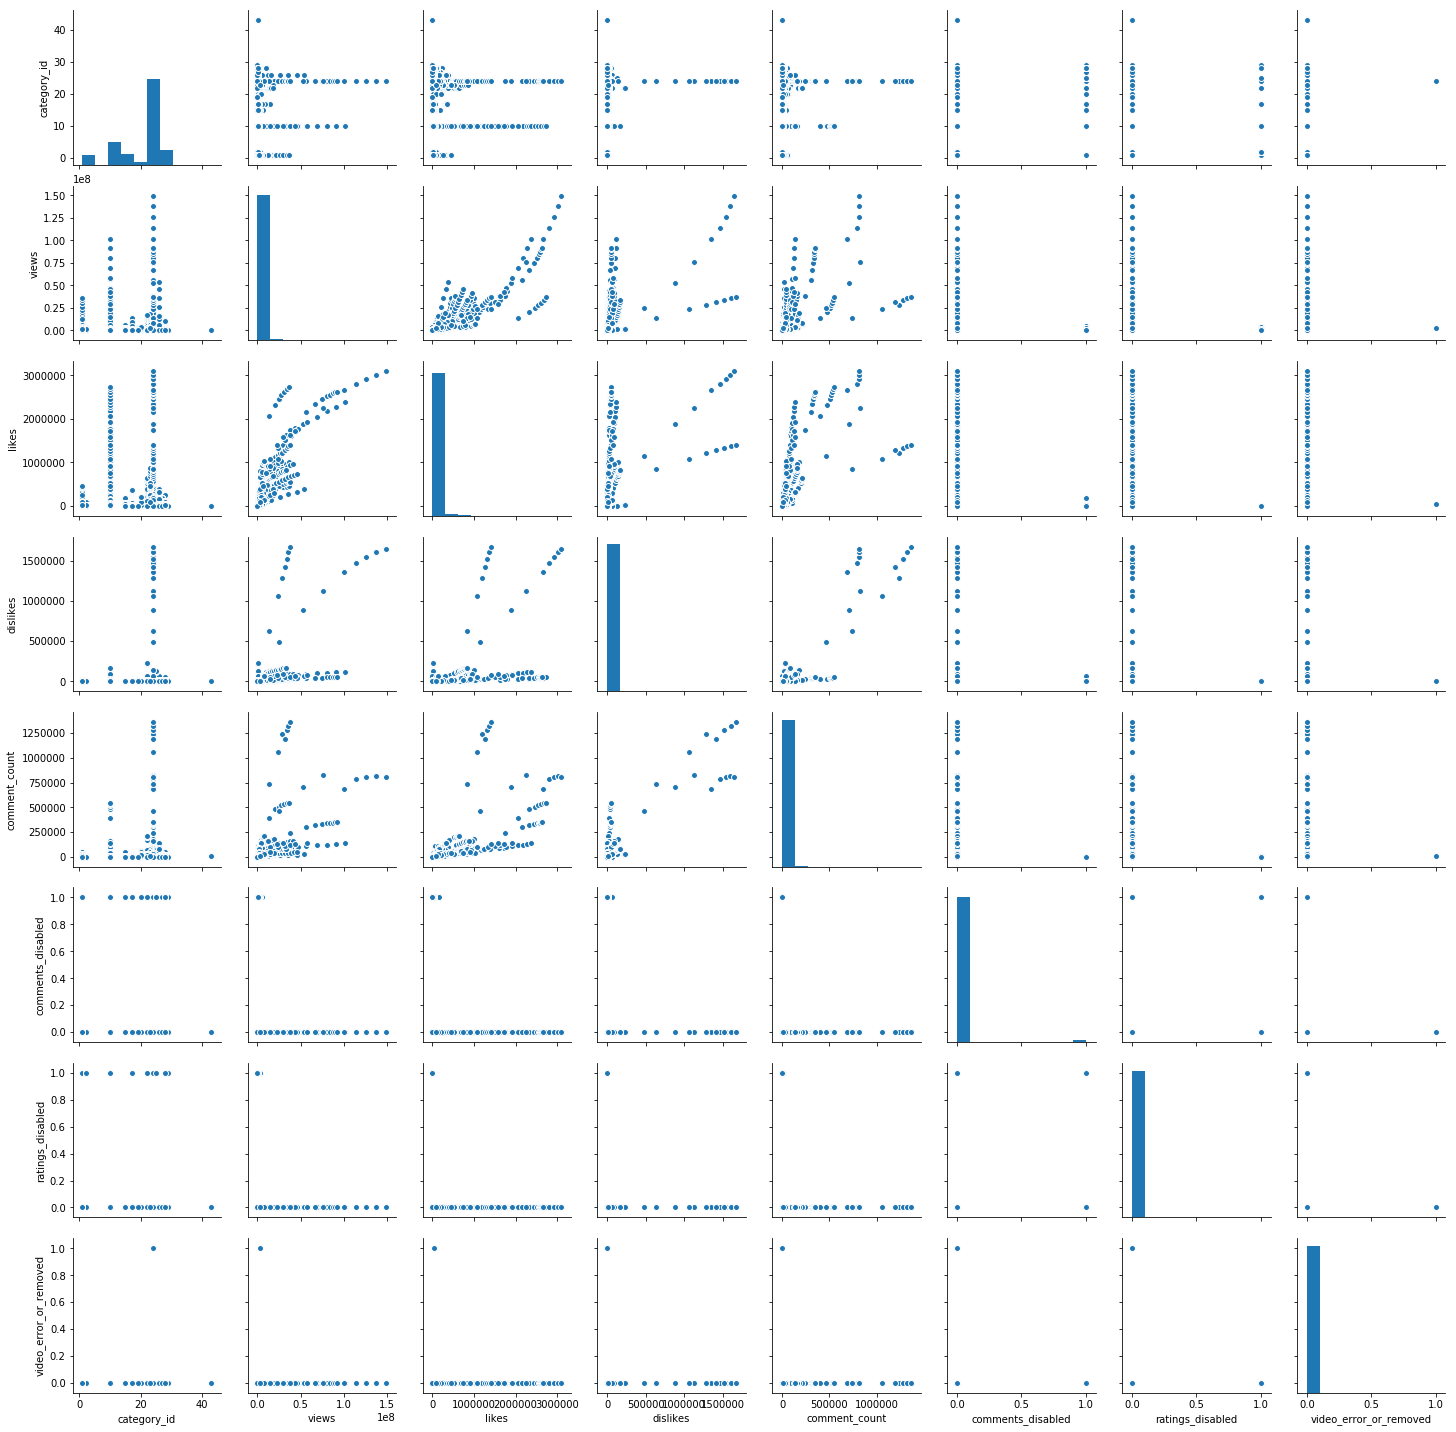

In [28]:
sns.pairplot(df)

(0, 5260088.0)

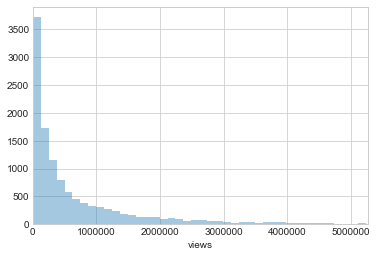

In [44]:
sns.distplot(df['views'],bins = 1200,kde=False)
plt.xlim(0,5.260088e+06)

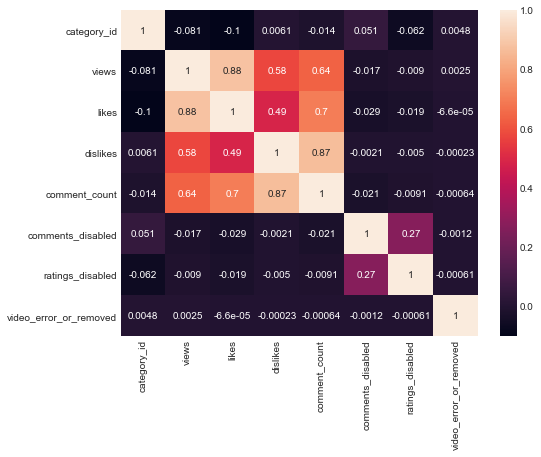

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

- ## Data Select

In [51]:
X = df[['likes','dislikes','comment_count']]

In [52]:
y = df['views']

- ## Split Data

> test_size (percentage of dataset)

> random_state (randome split state)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

- ## Train

In [60]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
print(lm.intercept_)

141730.389114


In [62]:
print(lm.coef_)

[ 28.80226285  62.92279236 -73.21908836]


In [65]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf.loc["intercept"] = lm.intercept_
cdf

,Coeff
likes,28.802263
dislikes,62.922792
comment_count,-73.219088
intercept,141730.389114


- ## Prediction

In [66]:
predictions = lm.predict(X_test)

- ## Verify Model

> **Scatter Plot**

> might like the scatter to be straight line

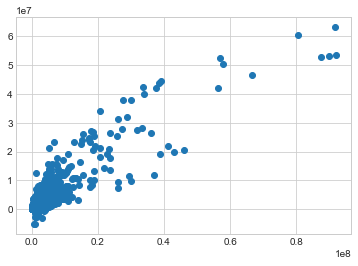

In [69]:
plt.scatter(y_test,predictions)

> **Residual Dist**

> like normal with mean 0 is good

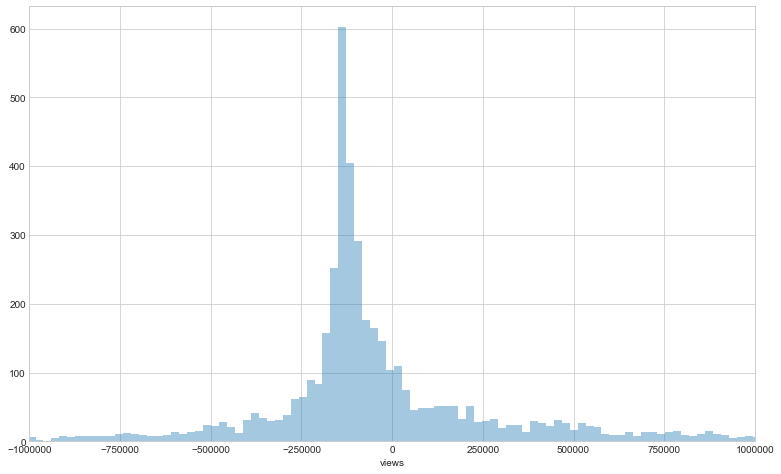

In [86]:
plt.figure(figsize=(13,8))
plt.xlim(-1e+06,1e+06);
sns.distplot((y_test-predictions),bins=2500,kde=False);

- ## Regression Evaluation Metrics

In [87]:
from sklearn import metrics

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 616143.88177395437)
('MSE:', 3634811779547.9102)
('RMSE:', 1906518.2347798068)
